In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit

import astropy.units as u

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "14",
      "figure.figsize" : [10,5]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [36]:
file_name = 'exit_try.txt'

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  3
initial time :  1.009683292521411

N_lines:  50


In [12]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  10.0


In [23]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    #masses[i_snap] = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part, usecols=0)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=3)
    data[i_snap] = values

print(data[0][0])

[ 1.          0.9897069   0.22351096  0.         -0.41361567  0.44403071
  0.        ]


In [42]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])

for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i][j] = data[i][j][0]
        positions[i][j] = data[i][j][1:4]
        velocities[i][j] = data[i][j][4:]


In [77]:
positions[:,0,0:2] # takes the position x and y for the first particle for each snapshot

array([[ 0.9897069 ,  0.22351096],
       [ 0.09432319,  0.08623646],
       [-0.88398917, -0.3041589 ],
       [-1.04441977,  0.14654532],
       [-0.26093763,  0.21897136],
       [ 0.74931478, -0.35016947],
       [ 1.07262495,  0.07188201],
       [ 0.43528263,  0.31332607],
       [-0.58219546, -0.35268571],
       [-1.08103248, -0.00414073]])

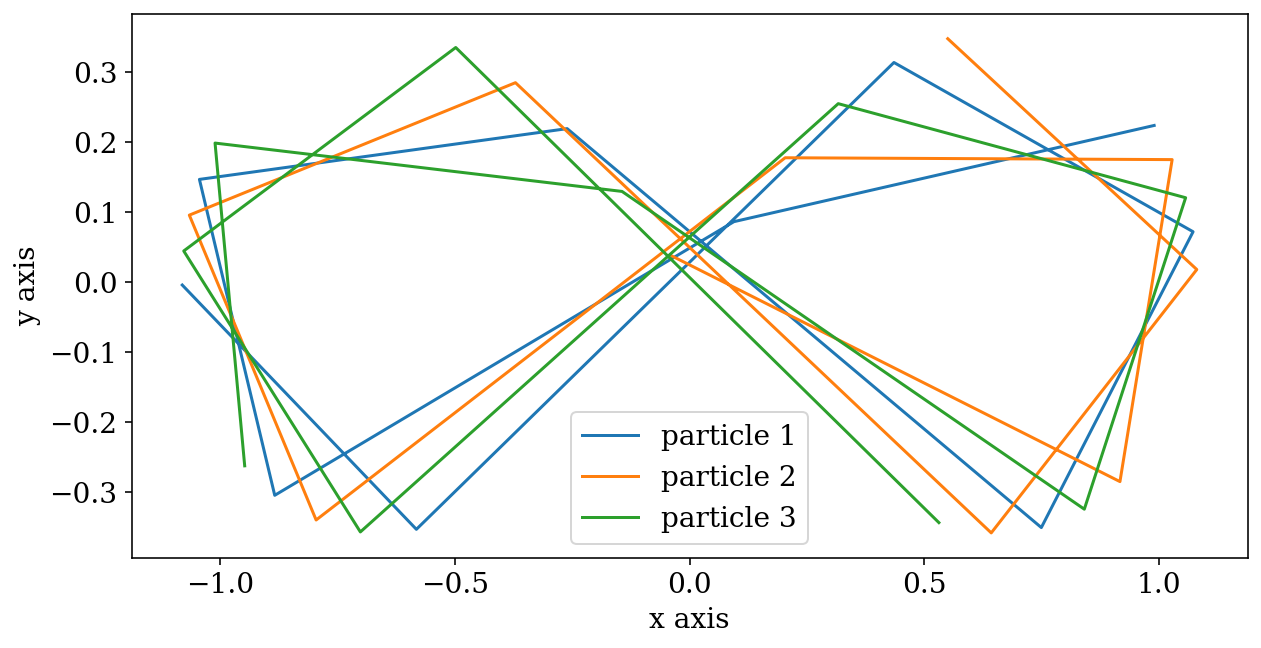

In [88]:
plt.plot(positions[:,0,0], positions[:,0,1], label='particle 1')
plt.plot(positions[:,1,0], positions[:,1,1], label='particle 2')
plt.plot(positions[:,2,0], positions[:,2,1], label='particle 3')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()